Integrantes:
* Raúl Monzon 17014
* David Valenzuela 171001


<h1>Mini Proyecto 2 </h1>

## Ejercicio 1

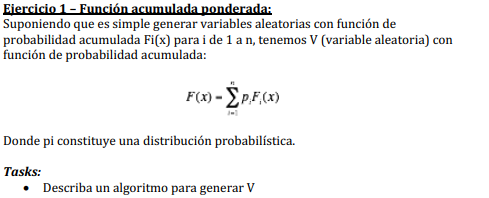

1. Definir el valor de n
2. Definir la función de probabilidad acumulada. Que por lo indicado en la guuía debe de cumplir con $F_{i}(x)$ para i de 1 hasta n
3. Generar I positiva. Donde $P(I = i)= p_{i}$
4. Si I = , obtener el valor de $Y_i$
5. Asignar el valor de $Y_i$ a X
6. Si no se ha recorrido toda I, repetir paso 3 y 4 




## Ejercicio 2

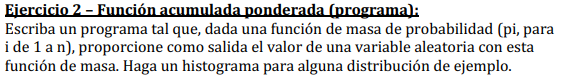

In [ ]:
from random import random
cantidad_pruebas = 1000000
#Elija las probabilidades acá. Debe asegurarse que sumen 1.
probabilidades = [0.05,0.05,0.03,0.02,0.82,0.03]

In [ ]:
#En este array guardamos la frecuencia con la que ha tocado cada opción
resultados = []
for i in probabilidades:
  resultados.append(0)
#largo del array de probabilidades
largo_prob = len(probabilidades)

#Se generaran la cantidad de numeros random especificada en cantidad_pruebas
for i in range(0,cantidad_pruebas):
  #Numero rando
  prob = random() 
  """
  La probabilidad acumulada irá guardando cual será el limite inferior 
  y se irá incrementando cada vez que pase de posición del array de 
  probabilidades
  """
  prob_acu = 0 
  for j in range(0,largo_prob):
    if (prob > prob_acu and prob <= prob_acu + probabilidades[j]):
      resultados[j] =  resultados[j]+1
    prob_acu = prob_acu + probabilidades[j]

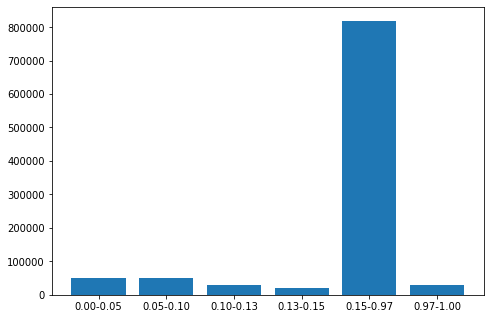

In [ ]:
import matplotlib.pyplot as plt
#Graficamos en una grafica de barras
prob_acu = 0
eje_x=[]
for i in range(0,largo_prob):
  mayor = prob_acu+probabilidades[i]
  eje_x.append("{0:.2f}".format(prob_acu)+"-"+"{0:.2f}".format(mayor))
  prob_acu = prob_acu+probabilidades[i]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(eje_x,resultados)
plt.show()

## Ejercicio 3

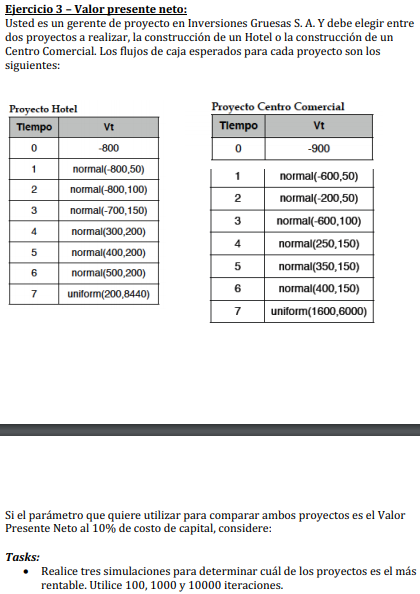

Definimos una funciona para generar variables aleatorias normales

In [ ]:
import math
import random

def normal(mu, sigma):
  exp = lambda x: -(1/x) * math.log(random.random())
  a = lambda y1, y2: ( y2 - ((( y1 - 1 ) ** 2) / 2) )
  while True:
    vlambda = 1
    y1, y2 = exp(vlambda), exp(vlambda)
    v1 = a(y1, y2)
    if v1 > 0:
      y1 = v1
      u = random.random()
      if u <= 0.5:
        return mu + (sigma * y1)
      else:
        mu - (sigma * y1)

Vamos a comenzar con la simulacion, primero definimos las funciones necesarias para la simulacion



In [ ]:
vpn = lambda n, p, y: n / ( (1 + p) ** y )
simulate = lambda iters, start, finish, data, p: [ (sum([vpn(normal(x[0], x[1]), p, x[2]) for x in data]) + start + finish()) for i in range(iters)]

Vamos a guardar la informacion de ambos proyectos

In [ ]:
import numpy as np
hotel = {
    'start': -800,
    'finish': lambda: vpn(np.random.uniform(200,8440), 0.1, 7),
    'return_p': 0.1,
    'data': [(-800, 50, 1), (-800, 100, 2), (-700, 150, 3), (-700, 150, 4), (300, 200, 5), (400, 200, 6), (500, 200, 7)]
}

mall = {
    'start': -900,
    'finish': lambda: vpn(np.random.uniform(1600,6000), 0.1, 7),
    'return_p': 0.1,
    'data': [(-600, 50, 1), (-200, 50, 2), (-600, 100, 3), (250, 150, 4), (350, 150, 5), (400, 150, 6)]
}

Vamos a simular con 100, 1000, 10000 iteraciones

Comenzamos por el hotel

In [ ]:
import matplotlib.pyplot as plt

Con 100 iteraciones

(array([ 3., 16., 18., 25., 14., 13.,  4.,  4.,  2.,  1.]),
 array([-149.4996964 ,   -9.18367593,  131.13234454,  271.44836501,
         411.76438548,  552.08040595,  692.39642642,  832.71244689,
         973.02846736, 1113.34448783, 1253.6605083 ]),
 <a list of 10 Patch objects>)

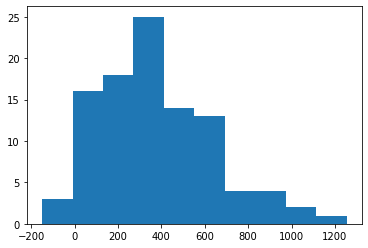

In [ ]:
res = simulate(100, hotel['start'], hotel['finish'], hotel['data'], hotel['return_p'])
plt.hist(res)

Con 1000 iteraciones

(array([ 63., 208., 295., 213., 123.,  62.,  19.,  12.,   4.,   1.]),
 array([-186.148844  ,   -5.78035454,  174.58813491,  354.95662436,
         535.32511382,  715.69360327,  896.06209273, 1076.43058218,
        1256.79907164, 1437.16756109, 1617.53605055]),
 <a list of 10 Patch objects>)

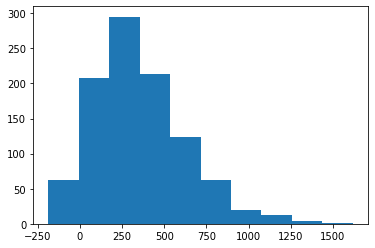

In [ ]:
res = simulate(1000, hotel['start'], hotel['finish'], hotel['data'], hotel['return_p'])
plt.hist(res)

Con 10000 iteraciones

(array([ 319., 1153., 1368., 1291., 1399., 1347., 1366., 1275.,  446.,
          36.]),
 array([-2249.47953035, -1679.67018713, -1109.86084392,  -540.0515007 ,
           29.75784251,   599.56718573,  1169.37652895,  1739.18587216,
         2308.99521538,  2878.80455859,  3448.61390181]),
 <a list of 10 Patch objects>)

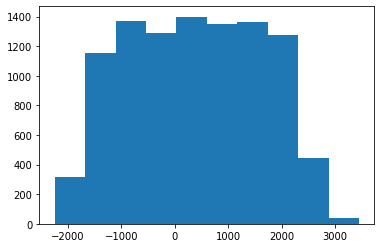

In [ ]:
res = simulate(10000, hotel['start'], hotel['finish'], hotel['data'], hotel['return_p'])
plt.hist(res)

Vamos a utilizar los resultados de la simulacion de 10000 iteraciones para sacar resultados

In [ ]:
profits = list(filter(lambda x: x > 0, res))
print(f'profit {len(profits)} out of {len(res)} ({ (len(profits)/len(res)) * 100 }%)')

profit 5936 out of 10000 (59.36%)


Continuamos con el centro comercial

Con 100 iteraciones

(array([ 5., 14., 18., 10., 14., 13., 12.,  7.,  3.,  4.]),
 array([1246.02227288, 1322.94878154, 1399.8752902 , 1476.80179886,
        1553.72830753, 1630.65481619, 1707.58132485, 1784.50783351,
        1861.43434217, 1938.36085083, 2015.28735949]),
 <a list of 10 Patch objects>)

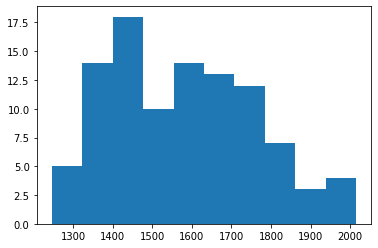

In [ ]:
res = simulate(100, mall['start'], mall['finish'], mall['data'], mall['return_p'])
plt.hist(res)

Con 1000 iteraciones

(array([ 52., 204., 287., 225., 136.,  58.,  21.,  12.,   2.,   3.]),
 array([1198.89329724, 1318.32358807, 1437.7538789 , 1557.18416972,
        1676.61446055, 1796.04475138, 1915.47504221, 2034.90533304,
        2154.33562387, 2273.7659147 , 2393.19620553]),
 <a list of 10 Patch objects>)

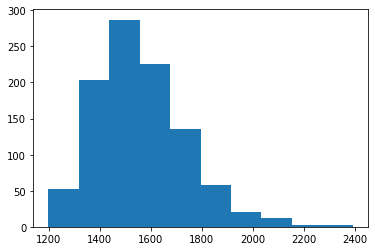

In [ ]:
res = simulate(1000, mall['start'], mall['finish'], mall['data'], mall['return_p'])
plt.hist(res)

Con 10000 iteraciones

(array([ 256., 1079., 1520., 1503., 1556., 1552., 1539.,  854.,  131.,
          10.]),
 array([-562.51771173, -218.44662601,  125.62445971,  469.69554544,
         813.76663116, 1157.83771688, 1501.9088026 , 1845.97988833,
        2190.05097405, 2534.12205977, 2878.19314549]),
 <a list of 10 Patch objects>)

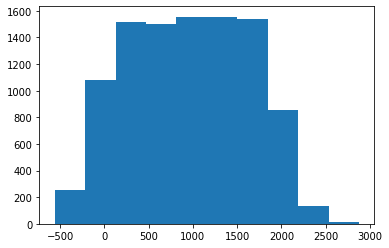

In [ ]:
res = simulate(10000, mall['start'], mall['finish'], mall['data'], mall['return_p'])
plt.hist(res)

Vamos a usar el resultado de la simulacion con 10000 iteraciones para obtener resultado

In [ ]:
profits = list(filter(lambda x: x > 0, res))
print(f'profit {len(profits)} out of {len(res)} ({ (len(profits)/len(res)) * 100 }%)')

profit 9127 out of 10000 (91.27%)


El proyecto mas rentable es el centro comercial

### Ejercicio 4

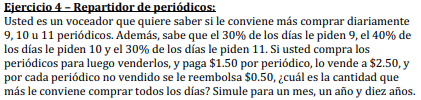

Vamos a comenzar definienfo la funcion de simulacion

In [ ]:
def sim(iters):
    t9, t10, t11 = 0, 0, 0
    a9, a10, a11, days = [], [], [], []

    for iter in range(iters):
        prob = random.random()
        if prob <= p9:
            t9 = t9 + 9
            t10 = t10 + 8
            t11 = t11 + 7
        elif (prob > p9) and (prob <= (p9 + p10)):
            t9 = t9 + 9
            t10 = t10 + 10
            t11 = t11 + 9
        elif prob > (p9 + p10):
            t9 = t9 + 9
            t10 = t10 + 10
            t11 = t11 + 11
        a9.append(t9)
        a10.append(t10)
        a11.append(t11)
        
        days.append(iter)

    return (days, a9, a10, a11)

Comenzamos con la simulacion de 1 mes

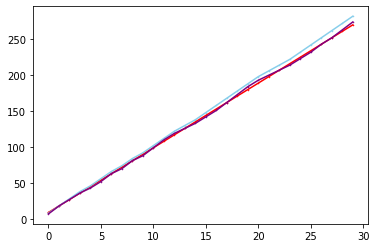

In [ ]:
days, a9, a10, a11 = sim(30)
plt.scatter(days, a9, s=0.3, color = 'red')
plt.scatter(days, a10, s=0.3, color = 'skyblue')
plt.scatter(days, a11, s=0.3, color = 'purple')

plt.plot(days, a9, 'red')
plt.plot(days, a10, 'skyblue')
plt.plot(days, a11, 'purple')
plt.show()

Simulacion para 1 año

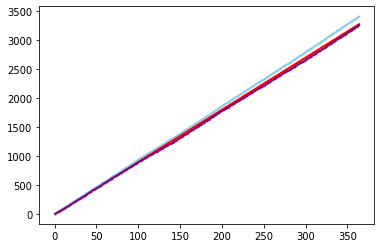

In [ ]:
days, a9, a10, a11 = sim(365)
plt.scatter(days, a9, s=0.3, color = 'red')
plt.scatter(days, a10, s=0.3, color = 'skyblue')
plt.scatter(days, a11, s=0.3, color = 'purple')

plt.plot(days, a9, 'red')
plt.plot(days, a10, 'skyblue')
plt.plot(days, a11, 'purple')
plt.show()

Simulacion un 10 años 

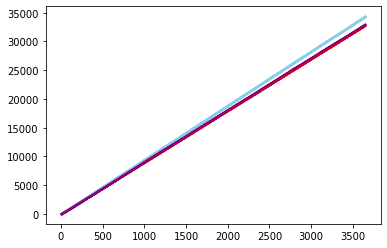

In [ ]:
days, a9, a10, a11 = sim(3650)
plt.scatter(days, a9, s=0.3, color = 'red')
plt.scatter(days, a10, s=0.3, color = 'skyblue')
plt.scatter(days, a11, s=0.3, color = 'purple')

plt.plot(days, a9, 'red')
plt.plot(days, a10, 'skyblue')
plt.plot(days, a11, 'purple')
plt.show()

Conviene mas comprar 10 periodicos diarios